In [3]:
!wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2024-02-04 05:17:41--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.179.179, 3.5.28.221, 3.5.29.33, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.179.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco_train2017.zip’

coco_train2017.zip  100%[===================>]  18.01G  45.8MB/s    in 7m 9s   

2024-02-04 05:24:51 (42.9 MB/s) - ‘coco_train2017.zip’ saved [19336861798/19336861798]

--2024-02-04 05:24:51--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.161.97, 54.231.230.9, 3.5.28.152, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.161.97|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[================

In [4]:
from zipfile import ZipFile, BadZipFile
import os
def extract_zip_file(extract_path):
    try:
        with ZipFile(extract_path+".zip") as zfile:
            zfile.extractall(extract_path)
        # remove zipfile
        zfileTOremove=f"{extract_path}"+".zip"
        if os.path.isfile(zfileTOremove):
            os.remove(zfileTOremove)
        else:
            print("Error: %s file not found" % zfileTOremove)
    except BadZipFile as e:
        print("Error:", e)
extract_train_path = "./coco_train2017"
extract_val_path = "./coco_val2017"
extract_ann_path="./coco_ann2017"
extract_zip_file(extract_train_path)
extract_zip_file(extract_val_path)
extract_zip_file(extract_ann_path)

In [5]:
!pip install pycocotools

## This code displays images along with their caption and classes

<ipython-input-8-57086c63a93d>:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


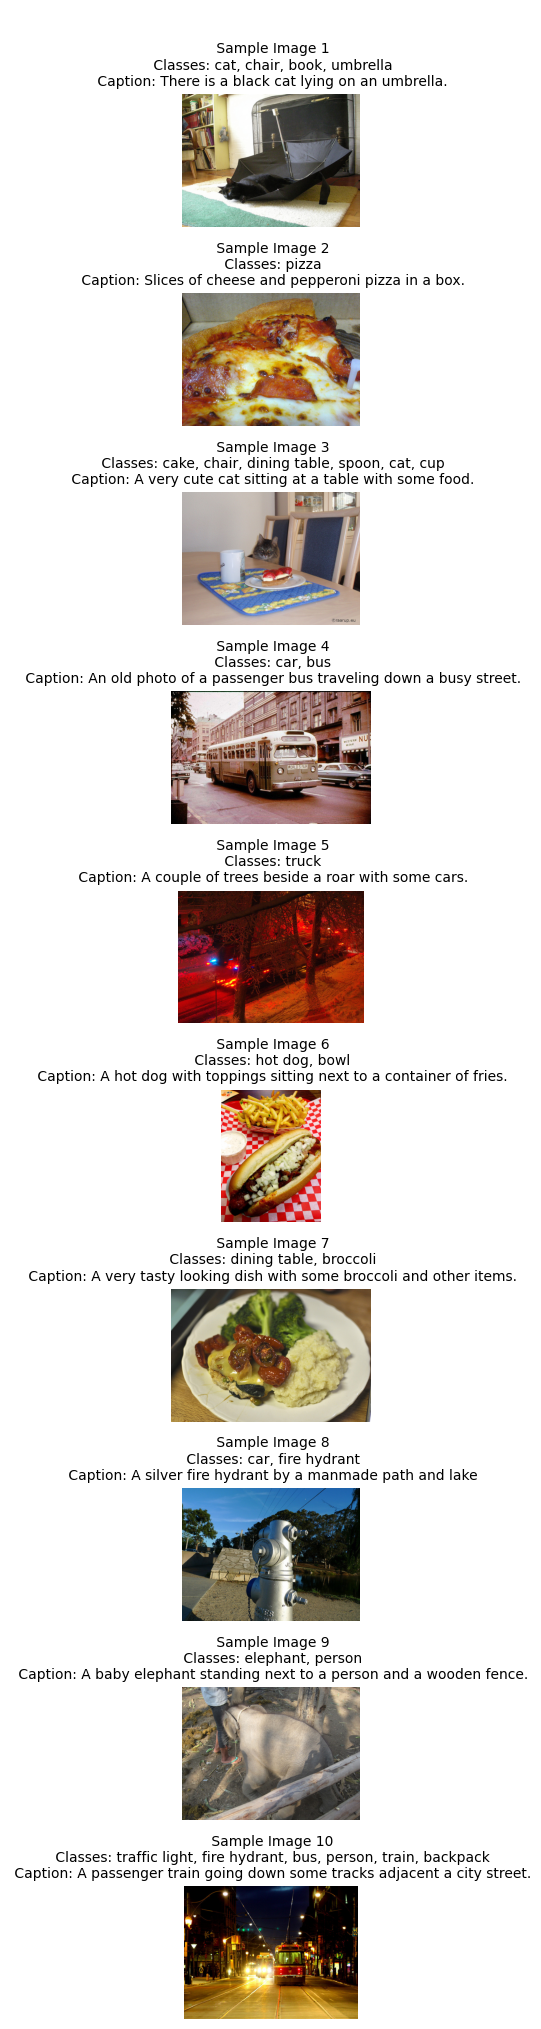

In [8]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image

# Path to the MS COCO annotations files
annotations_file = '/content/coco_ann2017/annotations/captions_train2017.json'
annotation_classes_file = '/content/coco_ann2017/annotations/instances_train2017.json'

# Path to the directory containing images
images_dir = '/content/coco_train2017/train2017'

# Number of samples to display
num_samples = 10

# Load annotations file
with open(annotations_file, 'r') as f:
    annotations = json.load(f)

# Load annotation classes file
with open(annotation_classes_file, 'r') as f:
    classes = json.load(f)

# Create a dictionary to map image IDs to their associated classes
image_classes = {}
for entry in classes['annotations']:
    image_id = entry['image_id']
    category_id = entry['category_id']
    class_name = next(category['name'] for category in classes['categories'] if category['id'] == category_id)
    image_classes.setdefault(image_id, set()).add(class_name)

# Get list of image IDs
image_ids = [entry['id'] for entry in annotations['images']]

# Randomly select num_samples image IDs
selected_image_ids = random.sample(image_ids, num_samples)

# Set up Matplotlib figure and grid
fig = plt.figure(figsize=(25, 25))
grid = gridspec.GridSpec(10, 1, wspace=0.4, hspace=0.5)

# Iterate over selected images
for i, image_id in enumerate(selected_image_ids):
    # Find corresponding annotation
    annotation = next(entry for entry in annotations['annotations'] if entry['image_id'] == image_id)

    # Get image file name and path
    image_filename = str(image_id).zfill(12) + '.jpg'
    image_path = os.path.join(images_dir, image_filename)

    # Open image using PIL
    img = Image.open(image_path)

    # Add image to the grid
    ax = plt.subplot(grid[i])
    ax.imshow(img)
    ax.axis('off')

    # Add caption and class label on top of the image
    image_class_names = list(image_classes.get(image_id, []))

    classes = ', '.join(image_class_names)
    caption = annotation['caption']

    label = f"\n \n Sample Image {i + 1}" + f"\n Classes: {classes}"+ f"\n Caption: {caption}"
    ax.set_title(label, fontsize=10)

plt.tight_layout()
plt.show()
